# PERHITUNGAN LINK POWER BUDGET ANTAR STO CILEGON,BANTEN DENGAN STO BANJARMASIN KALIMANTAN SELATAN
Untuk memenuhi TUGAS BESAR mata kuliah Sistem Komunikasi Optik (SKO)

In [201]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [202]:
#--SPESIFIKASI KABEL FO G.657
L=np.arange(1,901,1) #Km
Hspl=100 #Km
disp_M=16e-12 #s/Km.nm
alpha_f=0.3 #dB/Km

In [203]:
#--PARAMETER TRANSMITTER
Ptx_dB=13.8 #dBm
Spectral=0.8e-9 #nm
t_tx=2.4e-13 #s
Mod_NRZ=0.7 #NRZ
Mod_RZ=0.35 #RZ
Br=10e9 #Gbps
Tb=1/(Br) #s

In [204]:
#--PARAMETER RECEIVER
Sensitivitas=-28 #dBm
t_rx=5e-12 #s

In [205]:
#--SPESIFIKASI REDAMAN
N_c=2
alpha_c=0.5 #0.5 dB/titik
N_s=(L/Hspl)-1
alpha_s=0.2 #0.2 dB/titik
Ms=6 #dB

# Link Power Budget (LPB)
# Menggunakan Rumus sebagai berikut
# 
$$\alpha_T = 2\alpha_{c} + N_{s}\alpha_{s} + L\alpha_f + Ms$$

In [206]:
alpha_tot=N_c*alpha_c+N_s*alpha_s+L*alpha_f+Ms
print("Redaman Total",alpha_tot,"dB")

Redaman Total [  7.102   7.404   7.706   8.008   8.31    8.612   8.914   9.216   9.518
   9.82   10.122  10.424  10.726  11.028  11.33   11.632  11.934  12.236
  12.538  12.84   13.142  13.444  13.746  14.048  14.35   14.652  14.954
  15.256  15.558  15.86   16.162  16.464  16.766  17.068  17.37   17.672
  17.974  18.276  18.578  18.88   19.182  19.484  19.786  20.088  20.39
  20.692  20.994  21.296  21.598  21.9    22.202  22.504  22.806  23.108
  23.41   23.712  24.014  24.316  24.618  24.92   25.222  25.524  25.826
  26.128  26.43   26.732  27.034  27.336  27.638  27.94   28.242  28.544
  28.846  29.148  29.45   29.752  30.054  30.356  30.658  30.96   31.262
  31.564  31.866  32.168  32.47   32.772  33.074  33.376  33.678  33.98
  34.282  34.584  34.886  35.188  35.49   35.792  36.094  36.396  36.698
  37.     37.302  37.604  37.906  38.208  38.51   38.812  39.114  39.416
  39.718  40.02   40.322  40.624  40.926  41.228  41.53   41.832  42.134
  42.436  42.738  43.04   43.342  43.64

# Perhitungan LPB pada Sistem Komunikasi Kabel Laut (SKKL)
Hasil redaman total sudah pasti syarat LPB tidak akan terpenuhi,pada SKKL sendiri terdapat penguat seperti EDFA,RAMAN atau SOA. Sehingga dalam rumus penentuan Prx pun ada penambahan seperti dibawah ini: 
$$P_{rx} = P_{tx} - \alpha_{tot} + G$$
Namun sebelum kita menggunakan penguat pada EDFA,langkah pertama tentukanlah jarak antar penguat sebagai berikut:
<img src="C:\Users\Tiara\JARAK STO CILEGON DENGAN STO BANJARMASIN.PNG" width=800 height=400>

$$\alpha = G - M_{s}$$
$$L_{oa}=\frac{\alpha + \alpha_{s} + 2\alpha_{c}}{\alpha_{s} + \frac{\alpha_{s}}{100km}}$$


In [207]:
G_EDFA=20 #dB
alpha= G_EDFA-Ms
Loa=(alpha + alpha_s + 2*alpha_c)/(alpha_s + (alpha_s/100))
print ("Jarak antar penguat",Loa,"Km")

Jarak antar penguat 75.24752475247524 Km


In [208]:
Jum_G=L/Loa
print("Jumlah Gain EDFA",Jum_G)

Jumlah Gain EDFA [ 0.01328947  0.02657895  0.03986842  0.05315789  0.06644737  0.07973684
  0.09302632  0.10631579  0.11960526  0.13289474  0.14618421  0.15947368
  0.17276316  0.18605263  0.19934211  0.21263158  0.22592105  0.23921053
  0.2525      0.26578947  0.27907895  0.29236842  0.30565789  0.31894737
  0.33223684  0.34552632  0.35881579  0.37210526  0.38539474  0.39868421
  0.41197368  0.42526316  0.43855263  0.45184211  0.46513158  0.47842105
  0.49171053  0.505       0.51828947  0.53157895  0.54486842  0.55815789
  0.57144737  0.58473684  0.59802632  0.61131579  0.62460526  0.63789474
  0.65118421  0.66447368  0.67776316  0.69105263  0.70434211  0.71763158
  0.73092105  0.74421053  0.7575      0.77078947  0.78407895  0.79736842
  0.81065789  0.82394737  0.83723684  0.85052632  0.86381579  0.87710526
  0.89039474  0.90368421  0.91697368  0.93026316  0.94355263  0.95684211
  0.97013158  0.98342105  0.99671053  1.01        1.02328947  1.03657895
  1.04986842  1.06315789  1.076447

In [209]:
N_G = round(Jum_G[-1])
Prx=Ptx_dB-alpha_tot+(N_G*G_EDFA)
print("Prx=",Prx)

Prx= [ 2.46698e+02  2.46396e+02  2.46094e+02  2.45792e+02  2.45490e+02
  2.45188e+02  2.44886e+02  2.44584e+02  2.44282e+02  2.43980e+02
  2.43678e+02  2.43376e+02  2.43074e+02  2.42772e+02  2.42470e+02
  2.42168e+02  2.41866e+02  2.41564e+02  2.41262e+02  2.40960e+02
  2.40658e+02  2.40356e+02  2.40054e+02  2.39752e+02  2.39450e+02
  2.39148e+02  2.38846e+02  2.38544e+02  2.38242e+02  2.37940e+02
  2.37638e+02  2.37336e+02  2.37034e+02  2.36732e+02  2.36430e+02
  2.36128e+02  2.35826e+02  2.35524e+02  2.35222e+02  2.34920e+02
  2.34618e+02  2.34316e+02  2.34014e+02  2.33712e+02  2.33410e+02
  2.33108e+02  2.32806e+02  2.32504e+02  2.32202e+02  2.31900e+02
  2.31598e+02  2.31296e+02  2.30994e+02  2.30692e+02  2.30390e+02
  2.30088e+02  2.29786e+02  2.29484e+02  2.29182e+02  2.28880e+02
  2.28578e+02  2.28276e+02  2.27974e+02  2.27672e+02  2.27370e+02
  2.27068e+02  2.26766e+02  2.26464e+02  2.26162e+02  2.25860e+02
  2.25558e+02  2.25256e+02  2.24954e+02  2.24652e+02  2.24350e+02
  2.2

In [210]:
if Prx[-1] > Sensitivitas:
    print("LPB terpenuhi")
else:
    print("Tidak Terpenuhi, Cek kembali")

LPB terpenuhi


# Rise Time Budget
# Menggunakan Rumus sebagai berikut:
$$t_{sys}=\sqrt{t_{tx}^2+t_{mat}^2+t_{mod}^2+t_{wg}^2+t_{rx}}$$

In [211]:
t_mat=disp_M*L*Spectral
t_wg=0 #TIDAK ADA DI JURNAL
t_mod=0 #SM
t_sys=np.sqrt((t_tx**2)+(t_mat**2)+(t_mod**2)+(t_rx**2))
print("tsystem = ",t_sys,"s")

tsystem =  [5.00575669e-12 5.00575669e-12 5.00575669e-12 5.00575669e-12
 5.00575669e-12 5.00575669e-12 5.00575669e-12 5.00575669e-12
 5.00575669e-12 5.00575669e-12 5.00575669e-12 5.00575669e-12
 5.00575669e-12 5.00575669e-12 5.00575669e-12 5.00575669e-12
 5.00575669e-12 5.00575669e-12 5.00575669e-12 5.00575669e-12
 5.00575669e-12 5.00575669e-12 5.00575669e-12 5.00575669e-12
 5.00575669e-12 5.00575669e-12 5.00575669e-12 5.00575669e-12
 5.00575669e-12 5.00575669e-12 5.00575669e-12 5.00575669e-12
 5.00575669e-12 5.00575669e-12 5.00575669e-12 5.00575669e-12
 5.00575669e-12 5.00575669e-12 5.00575669e-12 5.00575669e-12
 5.00575669e-12 5.00575669e-12 5.00575669e-12 5.00575669e-12
 5.00575669e-12 5.00575669e-12 5.00575669e-12 5.00575669e-12
 5.00575669e-12 5.00575669e-12 5.00575669e-12 5.00575669e-12
 5.00575669e-12 5.00575669e-12 5.00575669e-12 5.00575669e-12
 5.00575669e-12 5.00575669e-12 5.00575669e-12 5.00575669e-12
 5.00575669e-12 5.00575669e-12 5.00575669e-12 5.00575669e-12
 5.00575669e-

In [212]:
a = Mod_NRZ*Tb
b = Mod_RZ*Tb
if t_sys[-1] < a and t_sys[-1] < b:
    print("NRZ dan RZ terpenuhi")
elif t_sys[-1] < b or t_sys[-1] > a:
    print("RZ terpenuhi")
elif t_sys[-1] < a or t_sys[-1] < b:
    print("NRZ terpenuhi")
else:
    print("RTB tidak terpenuhi")
print(a,b)

NRZ dan RZ terpenuhi
7e-11 3.5e-11


In [213]:
with open ('result.csv', mode='w') as result_file:
    result_write = csv.writer(result_file, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    result_write.writerow(['Jarak(L)', 'Total Dispersi (s)', 'Total Daya(dBm)'])
    for i in range(0, len(L)):
        result_write.writerow([L[i], t_sys[i], format(float(Prx[i]), '.3f')])

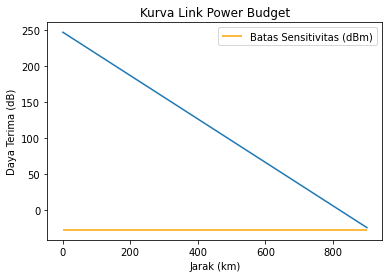

In [214]:
plt.plot(L,Prx)
plt.xlabel("Jarak (km)")
plt.ylabel("Daya Terima (dB)")
plt.title("Kurva Link Power Budget")
plt.hlines(y=Sensitivitas, xmin=0, xmax=L[-1], colors='orange', linestyles='solid', label='Batas Sensitivitas (dBm)') 
plt.legend()

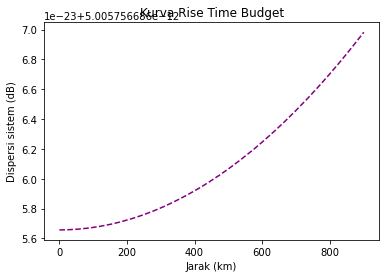

In [215]:
plt.xlabel("Jarak (km)")
plt.ylabel("Dispersi sistem (dB)")
plt.title("Kurva Rise Time Budget")
plt.plot(L,t_sys, color="purple",linestyle="dashed")
##plt.hlines(y=a, xmin=0, xmax=L[-1], colors='red', linestyles='solid', label='NRZ')
##plt.hlines(y=b, xmin=0, xmax=L[-1], colors='green', linestyles='solid', label='RZ')
##plt.legend()